<a href="https://colab.research.google.com/github/Kosarchik/Titanic-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,,Titanic dataset,,

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In this challenge, we should build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training dataset contains 891 rows. The data is clean, as there are no null rows. This was a primary introduction to the dataset. Let's take a closer look at what we can do with it.

In [6]:
import seaborn as sns
sns.set()
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

An important step in building machine learning and our model will be to find relationships between features and identify those that have the greatest impact on the outcome

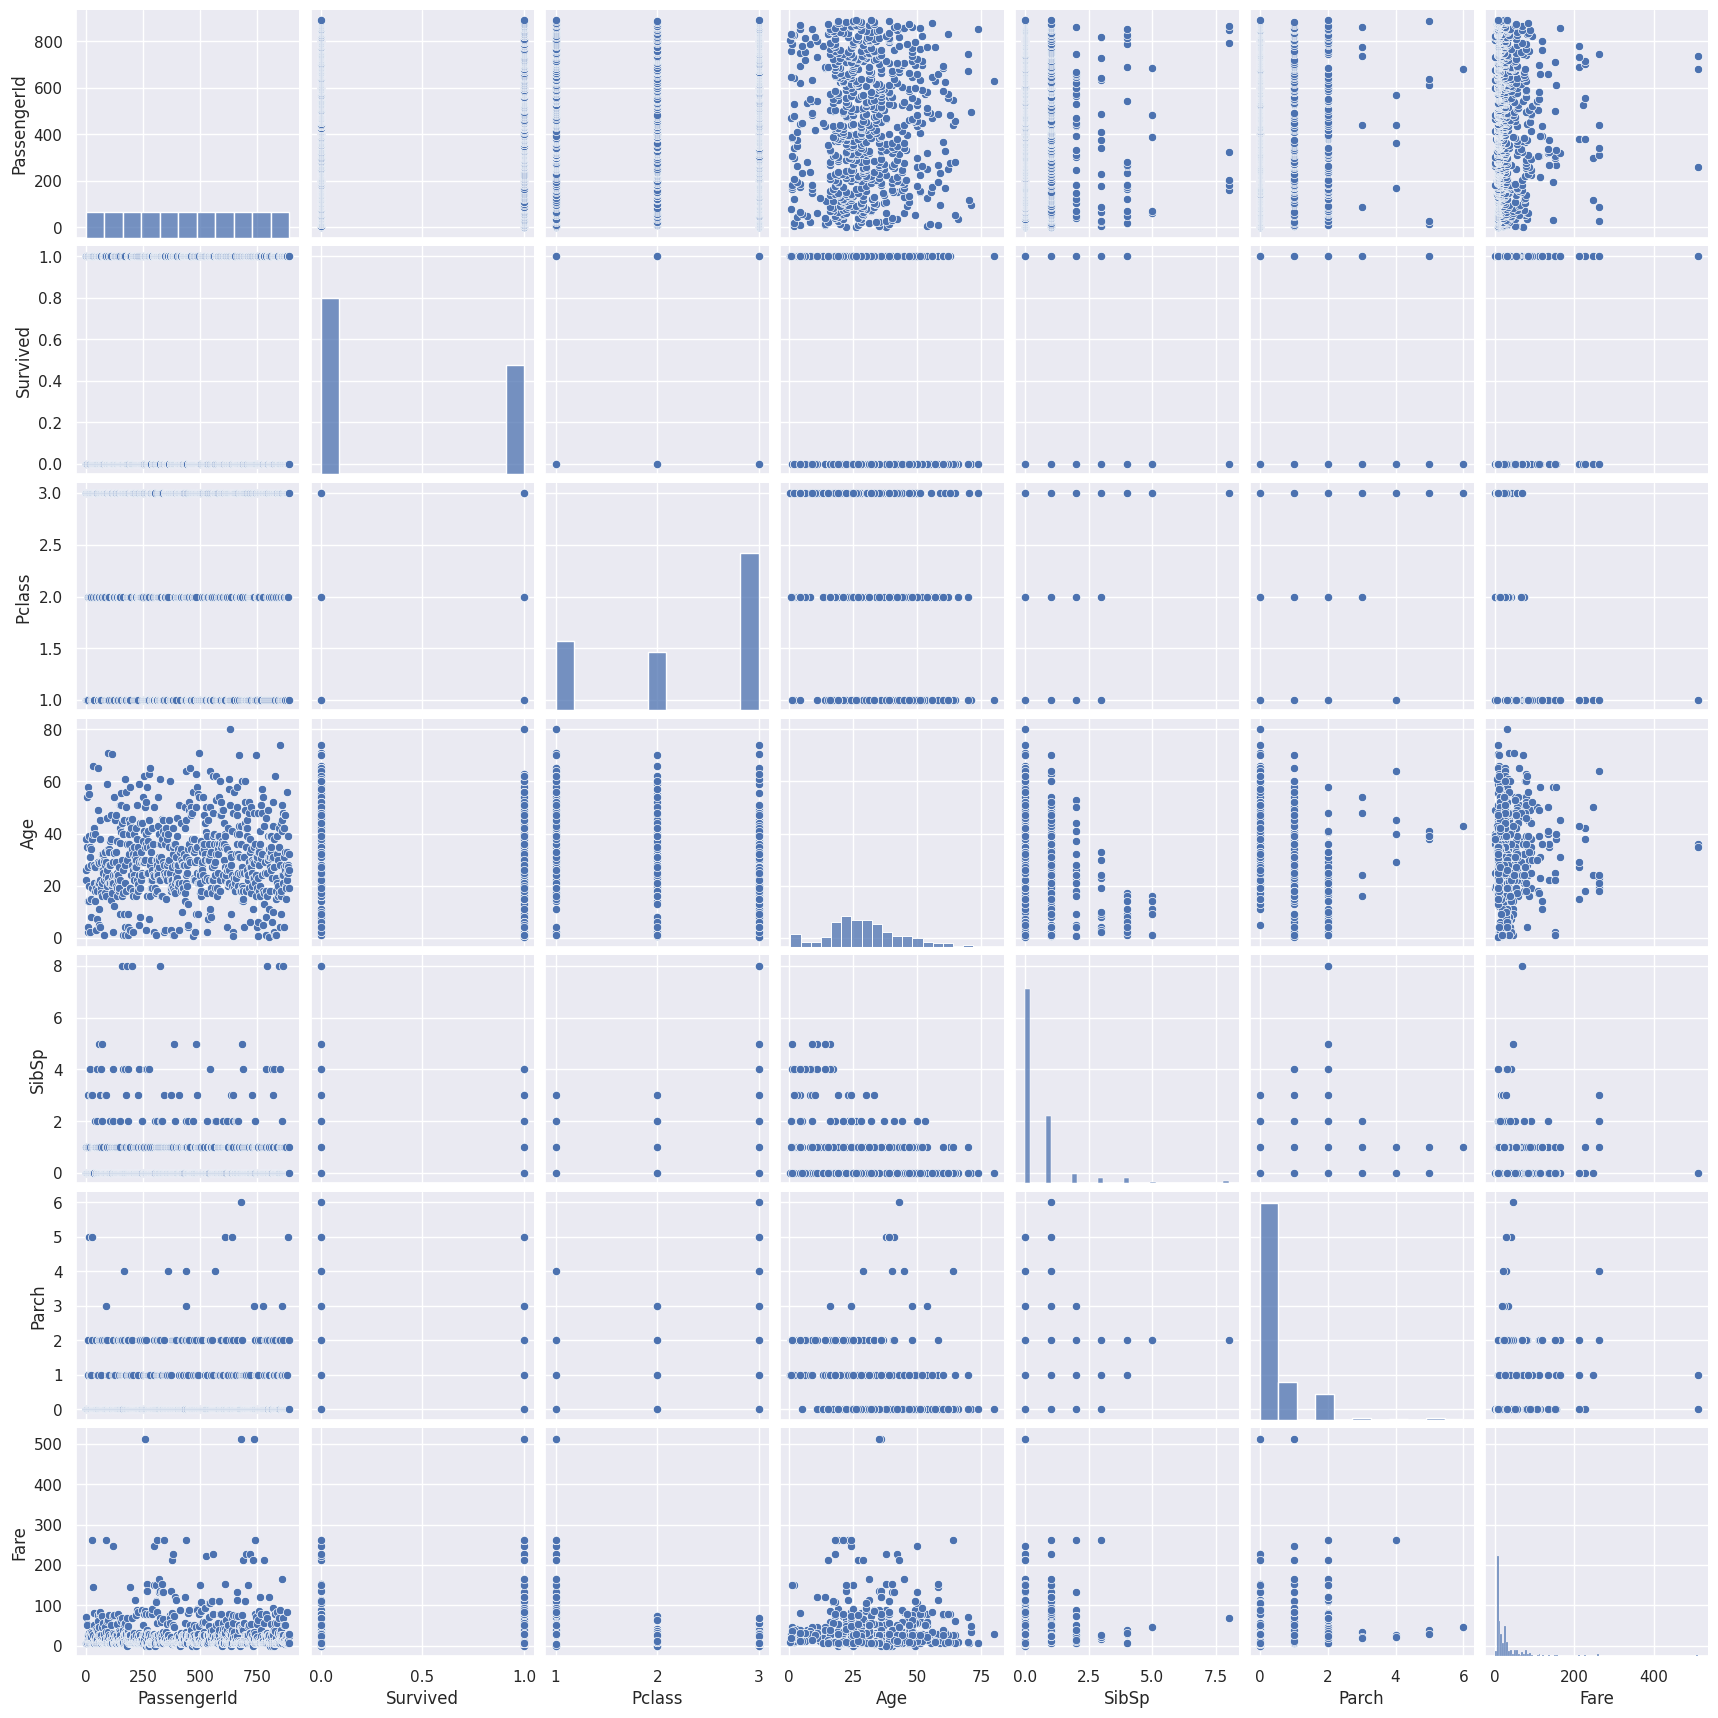

In [7]:
sns.pairplot(data = df)
plt.show()

<Axes: >

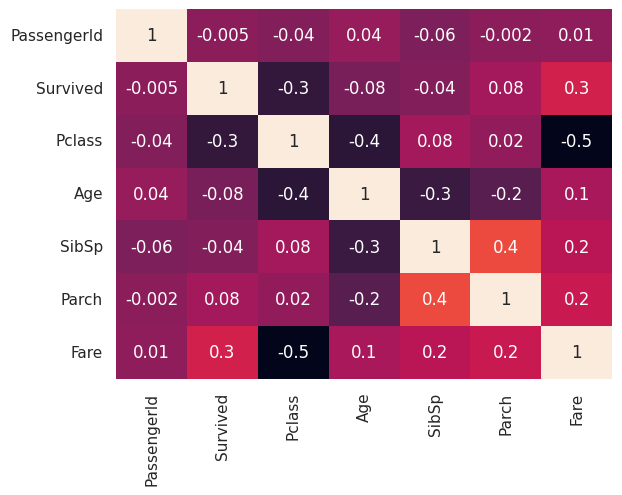

In [8]:

sns.heatmap(df.corr(), annot = True, fmt='.1g', cbar=False)

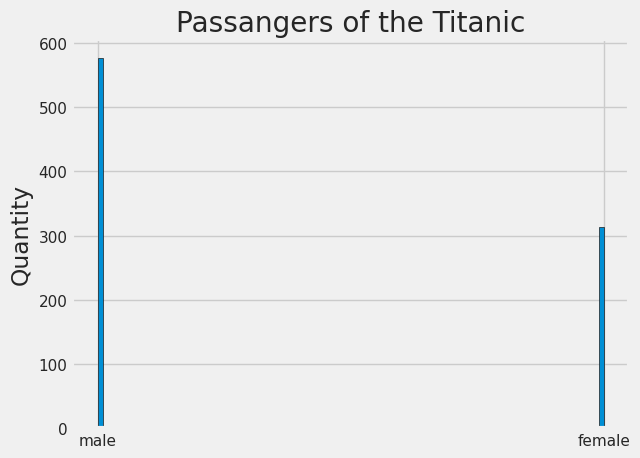

In [9]:
plt.style.use('fivethirtyeight')
plt.hist(df['Sex'].dropna(), bins = 100, edgecolor = 'k');
plt.ylabel('Quantity'); 
plt.title('Passangers of the Titanic');

In [10]:
survived=df[df['Survived'] == 1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
survived_rate = ( survived.shape[0] /  df.shape[0] ) * 100
print ( 'The survival rate of all people on the Titanic was ' , round(survived_rate, 2), '%. Just to clarify, we calculated this value only for the training dataset.')

The survival rate of all people on the Titanic was  38.38 %. Just to clarify, we calculated this value only for the training dataset.


In [12]:
survived_female = len(survived[survived ['Sex'] == 'female'])
survived_female

233

In [13]:
survived_female_rate = (survived_female / survived.shape[0]) * 100
print ( 'The survival rate of females on the Titanic is' , round(survived_female_rate, 2), '%.');
print( 'For male it was', round(100 - survived_female_rate,2), '%.')

The survival rate of females on the Titanic is 68.13 %.
For male it was 31.87 %.


In [14]:
#The above data provides us with the information that more people perished. Therefore, we can establish our baseline for the prediction that everyone died. After that, we will calculate the percentage error. 
print( "The first step in machine learning is defining the baseline. If we use the static method of defining the survival rate, the accuracy of prediction will be", round(100-survived_rate, 2),  '%.' )

The first step in machine learning is defining the baseline. If we use the static method of defining the survival rate, the accuracy of prediction will be 61.62 %.


The baseline accuracy is 61.62%. In further submission of our predictions, we will compare the accuracy with the baseline and decide what will be better for us.

In [15]:
train = df.drop(columns=['Name','Cabin','Ticket','PassengerId'], axis=1);# drop irrelevant columns

In [16]:
test = pd.read_csv('/content/test.csv')
PID = test['PassengerId'] # save PID for competition submission
test = test.drop(columns=['Name','Cabin','Ticket','PassengerId'], axis=1); # drop irrelevant columns
#Y_test=test['Survived']
#X_test=df.test('Survived',axis=1) 


 Define pipelines </p>
Treat columns separately depending on numerical or categorical features.
For numerical we scale while categorical features are encoded.
Both are swept through imputer for missing values.
Preprocessor is a pipeline with sub-pipes inside.

```
# This is formatted as code
```



In [17]:
X = ['Pclass','Age','SibSp','Parch', 'Fare']
cat_features=['Embarked', 'Sex']
y=['Survived']

In [18]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00


In [20]:
from catboost import CatBoostClassifier

In [21]:
params = {'verbose' : 100, 
          'random_seed' :42,
          'learning_rate' : 0.2,
           }
model = CatBoostClassifier(**params)

In [22]:
model.fit(train[X], train[y] )

0:	learn: 0.6587137	total: 47ms	remaining: 46.9s
100:	learn: 0.3258479	total: 128ms	remaining: 1.14s
200:	learn: 0.2355015	total: 205ms	remaining: 815ms
300:	learn: 0.1829073	total: 282ms	remaining: 654ms
400:	learn: 0.1545027	total: 361ms	remaining: 540ms
500:	learn: 0.1357948	total: 437ms	remaining: 435ms
600:	learn: 0.1236972	total: 530ms	remaining: 352ms
700:	learn: 0.1142642	total: 629ms	remaining: 268ms
800:	learn: 0.1070584	total: 762ms	remaining: 189ms
900:	learn: 0.1021626	total: 938ms	remaining: 103ms
999:	learn: 0.0978192	total: 1.18s	remaining: 0us


In [23]:
test['Survived'] = model.predict_proba(test[X])[:,1]

In [24]:
test.Survived = test.Survived.round()

In [25]:
#test.round({'Survived'}).astype(int)

test['Survived'] = test['Survived'].astype(int)
  
# displaying the datatypes
display(test.dtypes)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [26]:
test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0
414,1,female,39.0,0,0,108.9000,C,1
415,3,male,38.5,0,0,7.2500,S,0
416,3,male,NaN,0,0,8.0500,S,0


In [27]:
test = test.Survived
output = pd.DataFrame({'PassengerId': PID, 'Survived': test})
output.head(10)
output.to_csv('submission.csv', index=False)

In [28]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


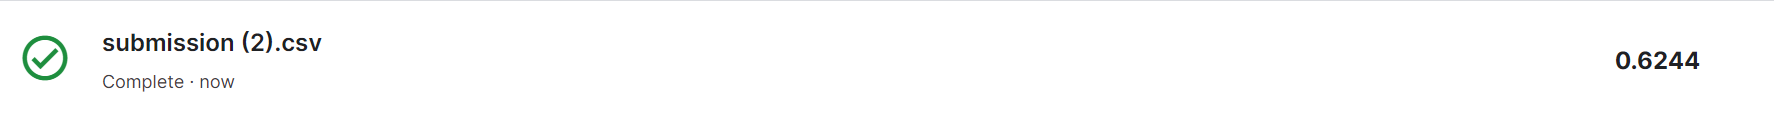

After we submitted our prediction to the Kaggle, we received accuracy that was comparable to our baseline. From this, we can conclude that this approach is not correct, and we need to look for other solutions

In [31]:
#Import libraries and separte training values 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
Y_train=train['Survived']
X_train=train.drop ('Survived',axis=1) 
test = pd.read_csv('/content/test.csv')

In [32]:
numerical_cols   = ['Age', 'SibSp', 'Parch', 'Fare'];
categorical_cols = ['Pclass', 'Sex', 'Embarked'];

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', RobustScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([('numeric', numeric_transformer, numerical_cols)
                               ,('categorical', categorical_transformer, categorical_cols) ]); 

#model
model = RandomForestClassifier(max_depth = 7,min_samples_split=2, n_estimators = 73,random_state=10);

#model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
model_pipeline.fit(X_train,Y_train);
y_submission = model_pipeline.predict(test)    
output = pd.DataFrame({'PassengerId': PID, 'Survived': y_submission})                             

In [33]:
output.to_csv('submission.csv', index=False)

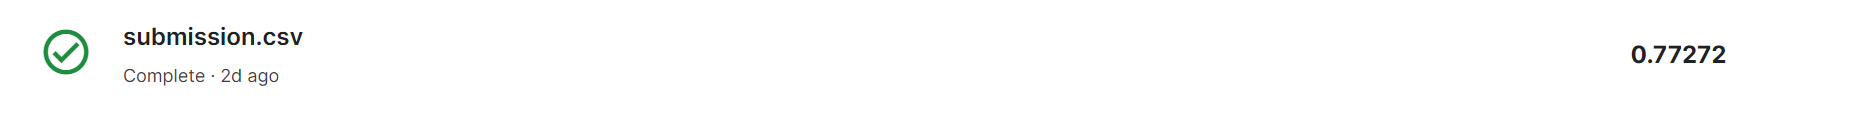

Recapitulation:
Today we investigated the disaster of the Titanic and built a model to predict the survival rate. For our prediction, we used two types of models: the CatBoost and Random Forest models. The score of the Random Forest model was much better and improved our results by 15% to 77.2%. Additionally, I see an opportunity to use other models like XGBClassifier, GradientBoostingClassifier, and AdaBoostClassifier. I will add those models and try to improve the results in the future.